# Выбор локации для скважины

В задании предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

### Подключим необходимые нам модули

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats as st
# import pandas_profiling

### Загрузим датасеты

In [7]:
df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')

### Проверим качество датасетов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Nul

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


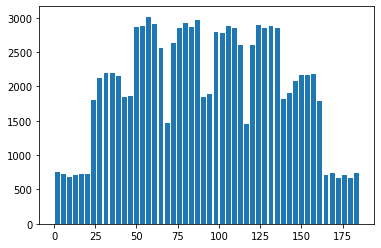

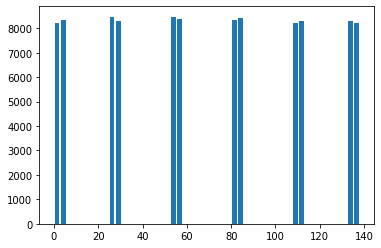

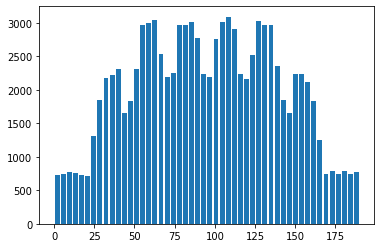

In [8]:
df1.info()
print()
df2.info()
print()
df3.info()
print()
print('Дубликаты df1 = ', df1.duplicated().sum())
print('Дубликаты df2 = ', df2.duplicated().sum())
print('Дубликаты df3 = ', df3.duplicated().sum())
print()
display(df1.describe())
display(df2.describe())
display(df3.describe())
print()
df1['product'].hist(grid=False, bins=50, rwidth=.8)
plt.show()
df2['product'].hist(grid=False, bins=50, rwidth=.8)
plt.show()
df3['product'].hist(grid=False, bins=50, rwidth=.8)
plt.show()

### Вывод: Пропусков нет, явных дубликатов нет, распределение целевых признаков в регионах сильно отличаются (для каждого региона необходима своя модель).

### Разделим данные на признаки и целевой признак

In [ ]:
# В данных нам не интересен 'id' скважины
X_1 = df1.drop(['product', 'id'], axis=1)
X_2 = df2.drop(['product', 'id'], axis=1)
X_3 = df3.drop(['product', 'id'], axis=1)

y_1 = df1['product']
y_2 = df2['product']
y_3 = df3['product']

### Вывод: данные загружены, проверены и подготовлены. Пропусков и дубликатов нет, вбросов тоже не отмечается

## Обучение и проверка модели

### Разделим все 3 датасета на тренировочную и валидационные выборки с отношением 75/25. Проверим что получилось.

In [ ]:
X_1_train, X_1_valid, y_1_train, y_1_valid = train_test_split(X_1, y_1, test_size=.25, random_state=0)
X_2_train, X_2_valid, y_2_train, y_2_valid = train_test_split(X_2, y_2, test_size=.25, random_state=0)
X_3_train, X_3_valid, y_3_train, y_3_valid = train_test_split(X_3, y_3, test_size=.25, random_state=0)

print(len(X_1_train))
print(len(X_2_train))
print(len(X_3_train))

### Для обучения используем модель - линейную регрессию так как предстоит работать с непрерывным значением в целевом признаке - объемом сырья.

In [ ]:
# для каждого региона будет своя модель
model_1 = LinearRegression()
model_2 = LinearRegression()
model_3 = LinearRegression()

# обучим все 3 модели
model_1.fit(X_1_train, y_1_train)
model_2.fit(X_2_train, y_2_train)
model_3.fit(X_3_train, y_3_train)

# на валидационных признаках предскажем объемы сырья для каждого региона
predict_1 = model_1.predict(X_1_valid)
predict_2 = model_2.predict(X_2_valid)
predict_3 = model_3.predict(X_3_valid)

print()
print('Средний запас в регионе 1 = {}, RMSE = {}'.format(predict_1.mean(), mean_squared_error(y_1_valid, predict_1)**.5))
print('Средний запас в регионе 2 = {}, RMSE = {}'.format(predict_2.mean(), mean_squared_error(y_2_valid, predict_2)**.5))
print('Средний запас в регионе 3 = {}, RMSE = {}'.format(predict_3.mean(), mean_squared_error(y_3_valid, predict_3)**.5))

### Вывод: Наибольший средний запас сырья в 1 и в 3 регионах, но при этом там низкое качество модели. Средний запас сылья во 2-м регионе ниже, но качество модели лучше и больше шансов "угадать" лучшие скважины

## Подготовка к расчёту прибыли

### Сохраним основные необходимые для расчета прибыли значения в переменных

In [ ]:
# бюджет 10 млрд руб
BUDGET = 10**10

#  цена одного барреля сырья 450 руб
COST_ONE_BARREL = 450

# бюджет для одной скважины при условии что мы будем бурить 200
BUDGET_ONE_WELL = BUDGET / 200

# объем сырья в тысячах баррелей, необходимый для компенсации затрат на бурения 1 скважины
VOLUME_RAW_FOR_ONE_WELL = BUDGET_ONE_WELL / (COST_ONE_BARREL * 1000)

print('Объем сырья в тысячах баррелей, для окупаемости затрат на одну скважину = ', VOLUME_RAW_FOR_ONE_WELL)

### Т.о. для того, чтобы скважина опукилась, необходимо исходить из предполагаемого объема в 111 тыс баррелей. В анализируемых 3-х регионах средний запас ниже этого значения (поэтому наугад бурить будет нерентабельно). Необоходима выборка 200 скважин, которые своим совокупным объемом перекроют затраты на их организацию. 

### Формула, для подсчета совокупной прибыли заданного количества "топовых" скважин из выборки

In [ ]:
def revenue(valid, predict, count):
    predict_sort = predict.sort_values(ascending=False)
    selected = valid.iloc[predict_sort.index][:count]
    return COST_ONE_BARREL * 1000 * selected.sum() - BUDGET

## Расчёт прибыли и рисков 

In [ ]:
state = np.random.RandomState(0)
    
values_1 = []
values_2 = []
values_3 = []

# Bootstrap

for i in range(1000):
    
    target_subsample_1 = pd.Series(predict_1).sample(500, replace=True, random_state=state)
    values_1.append(revenue(y_1_valid, target_subsample_1, 200))
    
    target_subsample_2 = pd.Series(predict_2).sample(500, replace=True, random_state=state)
    values_2.append(revenue(y_2_valid, target_subsample_2, 200))
    
    target_subsample_3 = pd.Series(predict_3).sample(500, replace=True, random_state=state)
    values_3.append(revenue(y_3_valid, target_subsample_3, 200))    
    
values_1 = pd.Series(values_1)
values_2 = pd.Series(values_2)
values_3 = pd.Series(values_3)
                     
mean_1 = values_1.mean()
mean_2 = values_2.mean()
mean_3 = values_3.mean()

print("Средняя выручка 1:", mean_1)
print("Средняя выручка 2:", mean_2)
print("Средняя выручка 3:", mean_3)
print()

# confidence_interval_1 = st.t.interval(alpha=0.95, df=len(values_1)-1, loc=values_1.mean(), scale=values_1.sem())
# confidence_interval_2 = st.t.interval(alpha=0.95, df=len(values_2)-1, loc=values_2.mean(), scale=values_2.sem())
# confidence_interval_3 = st.t.interval(alpha=0.95, df=len(values_3)-1, loc=values_3.mean(), scale=values_3.sem())

# print("95%-ый доверительный интервал 1:", confidence_interval_1)
# print("95%-ый доверительный интервал 2:", confidence_interval_2)
# print("95%-ый доверительный интервал 3:", confidence_interval_3)


In [ ]:
print('Регион №1 ДИ = от {:.2f} до {:.2f}'.format(values_1.quantile(0.025), values_1.quantile(0.975)))
print('Регион №2 ДИ = от {:.2f} до {:.2f}'.format(values_2.quantile(0.025), values_2.quantile(0.975)))
print('Регион №3 ДИ = от {:.2f} до {:.2f}'.format(values_3.quantile(0.025), values_3.quantile(0.975)))

### Оценим риски разработки в каждом из 3-х регионов

In [ ]:
print('Риски в регионе 1 = {:.2f}'.format(100 * (values_1 < 0).mean()))
print('Риски в регионе 2 = {:.2f}'.format(100 * (values_2 < 0).mean()))
print('Риски в регионе 3 = {:.2f}'.format(100 * (values_3 < 0).mean()))

# Вывод: 
1. Получить прибыль от добычи сырья, используя технологии ML возможно в каждом из 3-х регионов поскольку средняя выручка при реализации 200 скважин превышает свой бюджет в 10 млрд.
2. Средняя выручка прогнозируется: максимальная во 2 регионе, средняя в 1-м и минимальная в 3-м.
3. Доверительный интервал говорит нам, что в 95% случаев мы не выйдем за рамки запланированного бюджета в 10 млрд во втором регионе, в то время как в 1 и 3м есть риски уйти в минуса.
4. Риски при разработке выше в 3 и 1 регионе, минимальные риски во 2-м регионе.
5. Исходя из этого можно сделать вывод, что регион №2 дает максимальную прибыль при минимальных рисках.